In [1]:
import os
import time
import shutil
import pathlib
import itertools

In [2]:
# import data handling tools
# import cv2
import numpy as np
import pandas as pd
# import seaborn as sns
# sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
import tensorflow as tf
import os
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

In [12]:
# import warnings
# warnings.filterwarnings("ignore")

In [4]:
# print ('modules loaded')

In [5]:
# data_dir = "mango_dataset1.csv"
# filepaths = []
# labels = []

In [ ]:
import splitfolders

splitfolders.ratio("mango_dataset_pro", output="output_dataset", seed=1337, ratio=(0.7, 0.15, 0.15)) 


In [ ]:
# Define ImageDataGenerator with Rescaling
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


In [ ]:
# Load train dataset
train_generator = train_datagen.flow_from_directory(
    "output_dataset/train",
    target_size=(128, 128),  # Resize images
    batch_size=32,
    class_mode="categorical"  # Use 'binary' for 2 classes, 'categorical' for multi-class
)

In [ ]:
# Load test dataset
test_generator = test_datagen.flow_from_directory(
    "output_dataset/test",
    target_size=(128, 128),  # Resize images
    batch_size=32,
    class_mode="categorical"  # Use 'binary' for 2 classes, 'categorical' for multi-class
)

In [ ]:
# Load validation dataset
val_generator = val_datagen.flow_from_directory(
    "output_dataset/val",
    target_size=(128, 128),
    batch_size=32,
    class_mode="categorical"
)

In [15]:
# Define CNN Model
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D(2, 2),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Regularization to avoid overfitting
    layers.Dense(train_generator.num_classes, activation='softmax')  # Output layer
])


In [18]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 14, 14, 128)      

In [31]:
# Train model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50,  # Adjust based on dataset size
    steps_per_epoch=len(train_generator),
    validation_steps=len(val_generator)
)

Epoch 1/50
88/88 [==============================] - 28s 323ms/step - loss: 0.3797 - accuracy: 0.8636 - val_loss: 0.3692 - val_accuracy: 0.8767
Epoch 2/50
88/88 [==============================] - 31s 352ms/step - loss: 0.3507 - accuracy: 0.8779 - val_loss: 0.2654 - val_accuracy: 0.9133
Epoch 3/50
88/88 [==============================] - 29s 329ms/step - loss: 0.3257 - accuracy: 0.8814 - val_loss: 0.2235 - val_accuracy: 0.9300
Epoch 4/50
88/88 [==============================] - 28s 322ms/step - loss: 0.2576 - accuracy: 0.9111 - val_loss: 0.2969 - val_accuracy: 0.9033
Epoch 5/50
88/88 [==============================] - 30s 340ms/step - loss: 0.2574 - accuracy: 0.9132 - val_loss: 0.2413 - val_accuracy: 0.9250
Epoch 6/50
88/88 [==============================] - 29s 324ms/step - loss: 0.2183 - accuracy: 0.9207 - val_loss: 0.1771 - val_accuracy: 0.9400
Epoch 7/50
88/88 [==============================] - 28s 316ms/step - loss: 0.2222 - accuracy: 0.9232 - val_loss: 0.3611 - val_accuracy: 0.8867

In [32]:
# Extract accuracy and loss from history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [33]:
epochs_range = range(len(acc))

In [34]:
epochs_range

range(0, 50)

Text(0.5, 1.0, 'Training and Validation Accuracy')

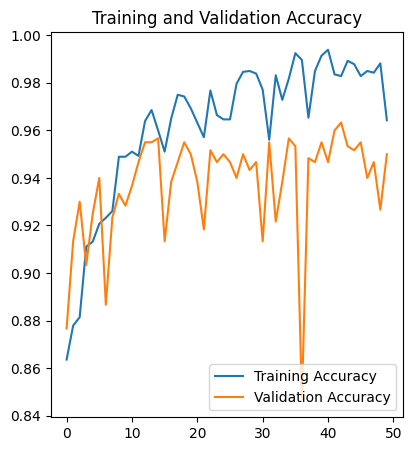

In [37]:
# Plot accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

Text(0.5, 1.0, 'Training and Validation Loss')

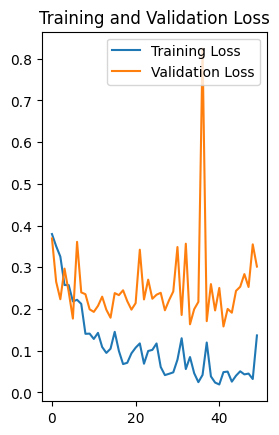

In [38]:
# Plot loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

In [39]:
plt.show()

In [40]:
# Evaluate model on test data
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.2f}")

19/19 [==============================] - 8s 426ms/step - loss: 0.2443 - accuracy: 0.9482
Test Accuracy: 0.95


In [ ]:
from tensorflow.keras.preprocessing import image
# Load an image
img_path = "images8.jpg"
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict class
predictions = model.predict(img_array)
predicted_index = np.argmax(predictions)
print(f"Predicted index: {predicted_index}")

class_labels = {v: k for k, v in train_generator.class_indices.items()}  # Reverse mapping
predicted_class_name = class_labels[predicted_index]

print(f"Predicted Class: {predicted_class_name}")  # Print actual class name



In [66]:
model.save("image_classifier_model.h5")